<a href="https://colab.research.google.com/github/gauravvojha/Cognifyz_DataScience_tasks/blob/main/task1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

# Load the dataset

In [2]:
df = pd.read_csv('/content/restaurant_data.csv')

In [3]:
# Step 1: Visualize the locations of restaurants on a map
# Create a map centered around an average location

In [4]:
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=10)

# Add markers for each restaurant

In [5]:
marker_cluster = MarkerCluster().add_to(restaurant_map)
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']} ({row['Aggregate rating']})"
    ).add_to(marker_cluster)

# Save the map to an HTML file

In [6]:
restaurant_map.save('restaurant_map.html')

# Step 2: Analyze the distribution of restaurants across different cities or countries
# Distribution by City

<ipython-input-7-31c7196ba2ae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=city_counts.index, x=city_counts.values, palette='viridis')


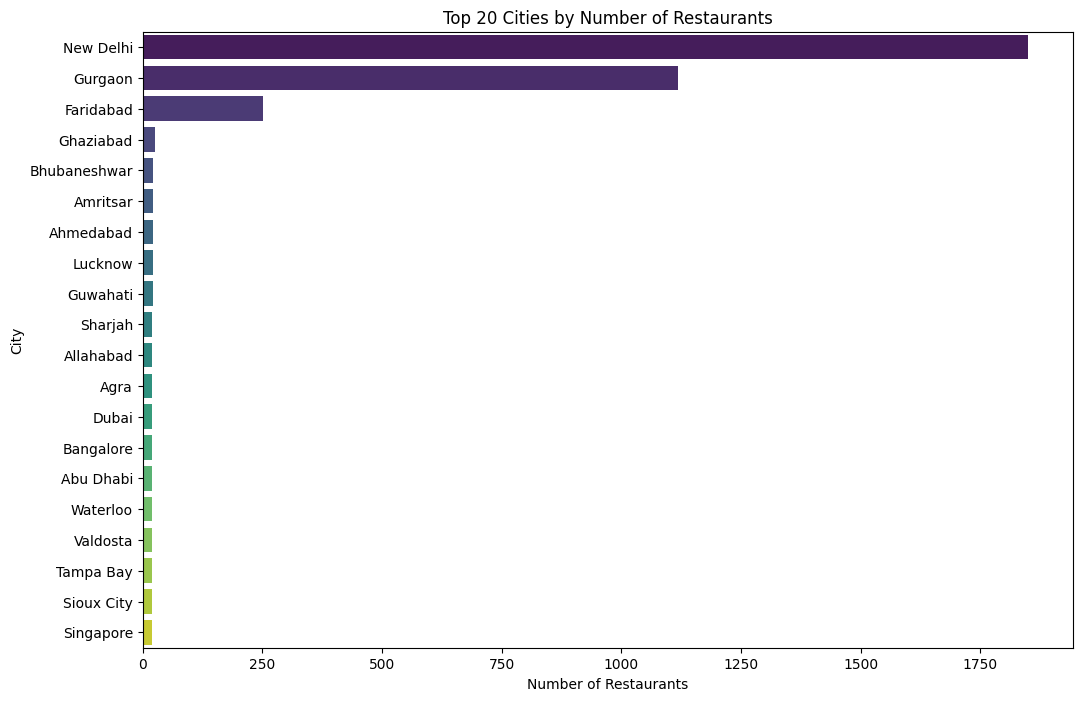

In [7]:
plt.figure(figsize=(12, 8))
city_counts = df['City'].value_counts().head(20)
sns.barplot(y=city_counts.index, x=city_counts.values, palette='viridis')
plt.title('Top 20 Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

# Distribution by Country

<ipython-input-8-5adb72ead644>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_counts.index, x=country_counts.values, palette='viridis')


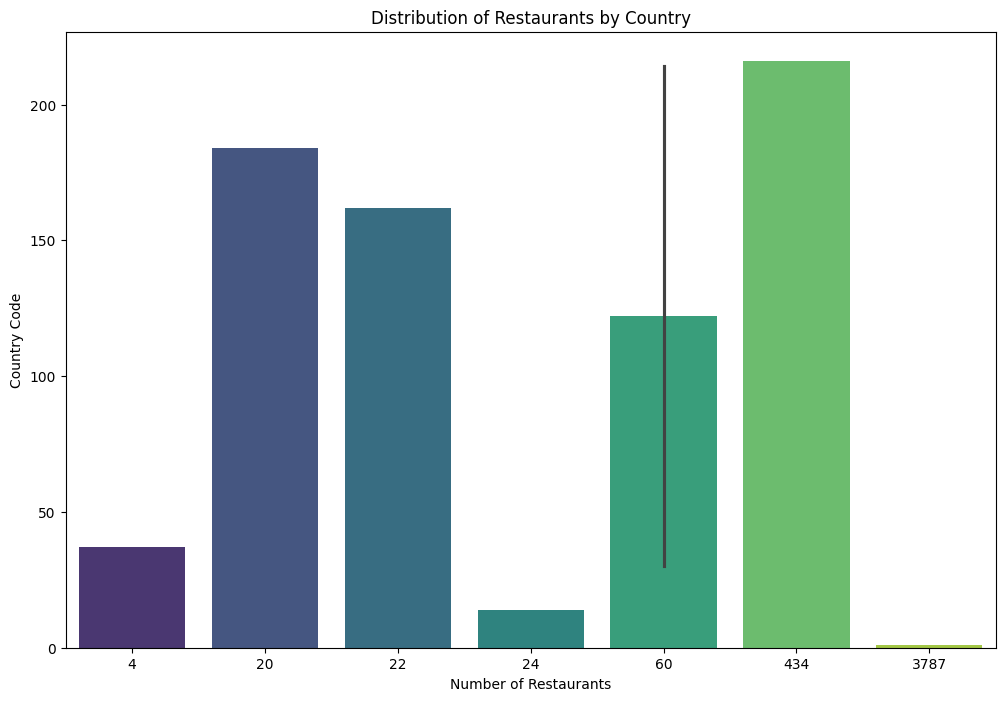

In [8]:
plt.figure(figsize=(12, 8))
country_counts = df['Country Code'].value_counts()
sns.barplot(y=country_counts.index, x=country_counts.values, palette='viridis')
plt.title('Distribution of Restaurants by Country')
plt.xlabel('Number of Restaurants')
plt.ylabel('Country Code')
plt.show()

# Step 3: Correlation between location and rating
# Group by City and calculate mean rating

In [9]:
city_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(20)
print("\nTop 20 Cities by Average Aggregate Rating:")
print(city_ratings)


Top 20 Cities by Average Aggregate Rating:
City
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
Taguig City         4.525000
Lincoln             4.500000
Tagaytay City       4.500000
Orlando             4.475000
Rest of Hawaii      4.410000
Tampa Bay           4.410000
Tanunda             4.400000
Palm Cove           4.400000
Bangalore           4.375000
Dubai               4.370000
Pasay City          4.366667
Hyderabad           4.344444
Chennai             4.315000
Mohali              4.300000
Clatskanie          4.300000
Name: Aggregate rating, dtype: float64


<ipython-input-10-fe9114a14184>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=city_ratings.index, x=city_ratings.values, palette='viridis')


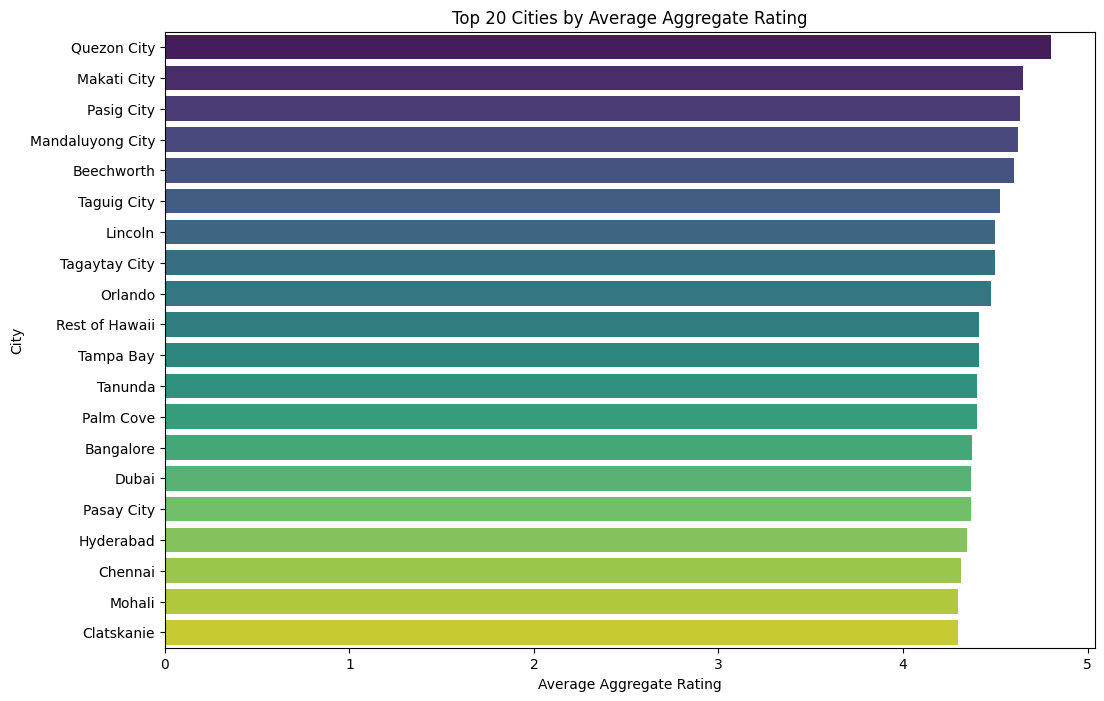

In [10]:
plt.figure(figsize=(12, 8))
sns.barplot(y=city_ratings.index, x=city_ratings.values, palette='viridis')
plt.title('Top 20 Cities by Average Aggregate Rating')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('City')
plt.show()

# Group by Country and calculate mean rating

In [11]:
country_ratings = df.groupby('Country Code')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage Aggregate Rating by Country:")
print(country_ratings)


Average Aggregate Rating by Country:
Country Code
162    4.468182
214    4.233333
216    4.004378
30     3.763333
14     3.658333
37     3.575000
184    3.575000
1      2.812837
Name: Aggregate rating, dtype: float64


<ipython-input-12-d7be9eb53f9d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_ratings.index, x=country_ratings.values, palette='viridis')


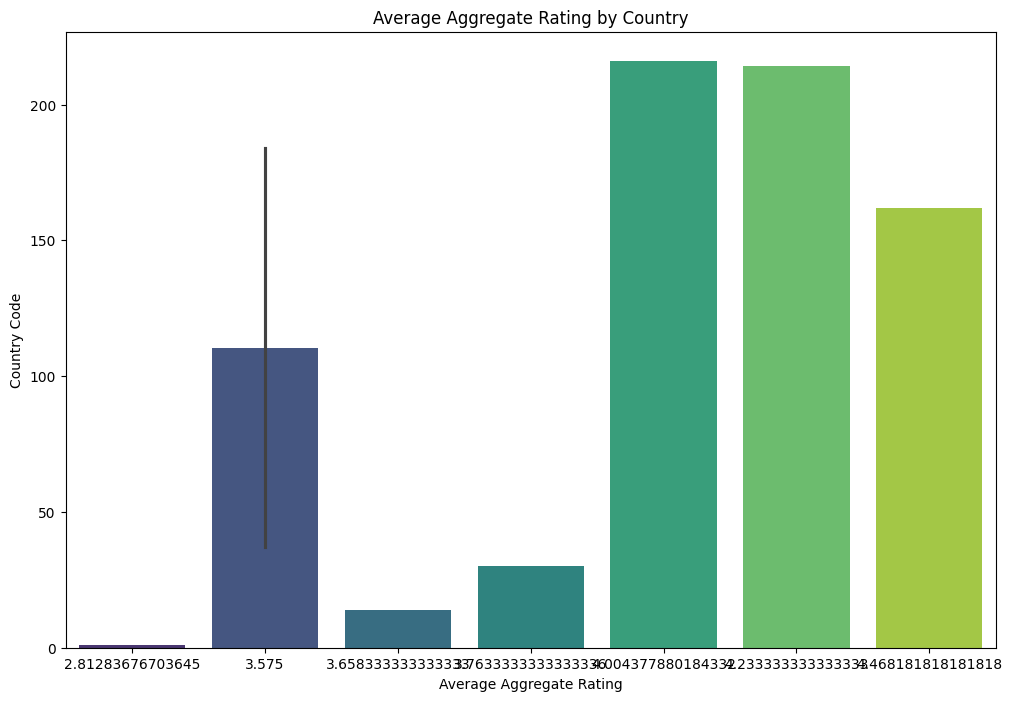

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(y=country_ratings.index, x=country_ratings.values, palette='viridis')
plt.title('Average Aggregate Rating by Country')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('Country Code')
plt.show()

# Correlation between latitude, longitude, and rating

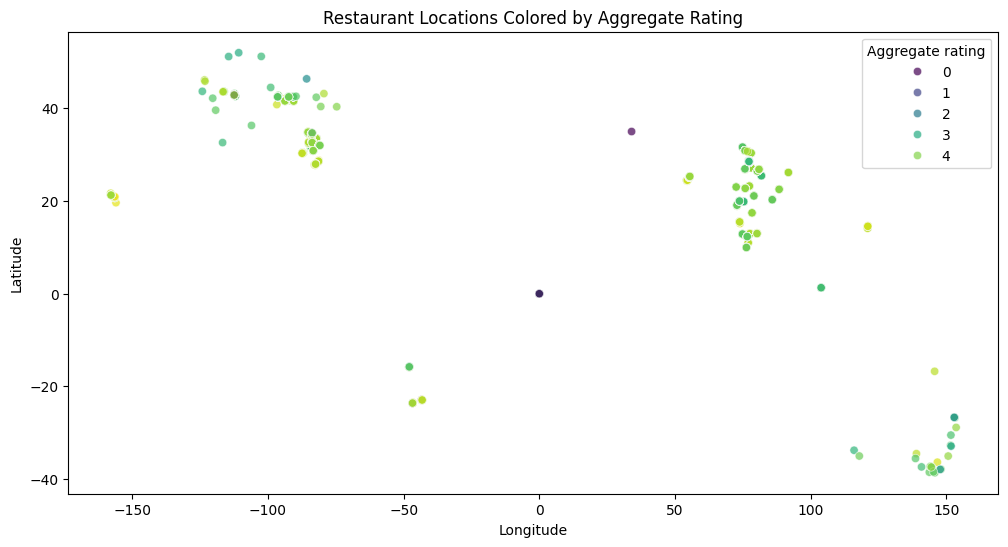

In [13]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Aggregate rating', data=df, palette='viridis', alpha=0.7)
plt.title('Restaurant Locations Colored by Aggregate Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()